# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading the dataset using pandas

In [7]:
dataset = pd.read_csv('insurance.csv')

# Data preprocessing (Data cleaning)

In [8]:
df_dataset = pd.DataFrame()
n_sex={'female':0,'male':1}
n_smoker={'yes':0,'no':1}
n_region={'southwest':0,'southeast':1,'northwest':2,'northeast':4}

def clean_sex(x):
    return n_sex[x]
def clean_region(x):
    return n_region[x]
def clean_smoker(x):
    return n_smoker[x]
df_dataset['age']=dataset['age']
df_dataset['sex']=dataset['sex'].apply(clean_sex)
df_dataset['bmi']=dataset['bmi']
df_dataset['children']=dataset['children']
df_dataset['smoker']=dataset['smoker'].apply(clean_smoker)
df_dataset['region']=dataset['region'].apply(clean_region)
df_dataset['charges']=dataset['charges']
print(df_dataset.head(10))

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       0       0  16884.92400
1   18    1  33.770         1       1       1   1725.55230
2   28    1  33.000         3       1       1   4449.46200
3   33    1  22.705         0       1       2  21984.47061
4   32    1  28.880         0       1       2   3866.85520
5   31    0  25.740         0       1       1   3756.62160
6   46    0  33.440         1       1       1   8240.58960
7   37    0  27.740         3       1       2   7281.50560
8   37    1  29.830         2       1       4   6406.41070
9   60    0  25.840         0       1       2  28923.13692


# Creating feature matrix 'X' and target vector 'Y'

In [9]:
feature_names = ['age','sex','bmi','children','smoker','region']
X = df_dataset[feature_names]
Y = df_dataset.charges

# Splitting the data into train and test using sklearn (80:20)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Fitting the model using Linear Regression from sklearn

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
train_score=model.score(X_train,Y_train)
train_error=1-train_score
print("Training score : ",train_score,"\nTraining error : ",train_error)

Training score :  0.7368411688414538 
Training error :  0.2631588311585462


# Predict targets using test dataset

In [13]:
pred=model.predict(X_test)

# Comparing actual targets(X-axis) Vs predicted targets(Y-axis)

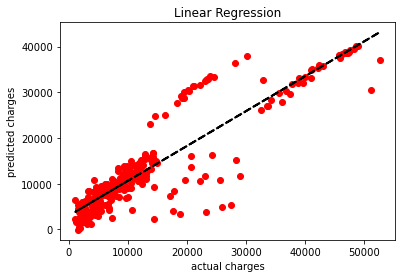

In [23]:
plt.scatter(Y_test, pred,  color='red')
plt.title('Linear Regression') 
plt.xlabel('actual charges') 
plt.ylabel('predicted charges') 
m, b = np.polyfit(Y_test, pred, 1)
plt.plot(Y_test, m*Y_test+b,'k--', lw=2)
plt.show()

# Checking the testing error

In [15]:
from sklearn.metrics import r2_score
test_set_r2 = r2_score(Y_test, pred)
print('R2 score for test dataset : ',test_set_r2)
print('Test error                : ',1-test_set_r2)

R2 score for test dataset :  0.799895768383581
Test error                :  0.200104231616419


# We see that the error is reasonable with a good R2 score. Hence, we can say that, Linear Regression algorithm can be a good choice to implement the model. 